# Exploring Weather Trends 

## Steps

### SQL
Initialy we needed to extract the csv files needed for visualization & interpretation.

Thus, I extracted the global data simply as:
```
SELECT * FROM global_data 
```

Then I needed to choose my country only, thus I used the below SQL statement:
```
SELECT * FROM city_data
where city = 'Cairo'
```
Then I downloaded the csv files & took a look at them manually to just make sure everything is in place.

### Python (Pandas & Matplotlib)

After that, I used pandas to read the csv files for interpretation & matplotlib for visualization.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
cnt_df = pd.read_csv('country.csv')

cnt_df.head()

,year,city,country,avg_temp
0,1849,Abidjan,Côte D'Ivoire,25.58
1,1850,Abidjan,Côte D'Ivoire,25.52
2,1851,Abidjan,Côte D'Ivoire,25.67
3,1852,Abidjan,Côte D'Ivoire,NaN
4,1853,Abidjan,Côte D'Ivoire,NaN


In [3]:
glb_df = pd.read_csv('global.csv')

glb_df.head()

,year,avg_temp
0,1750,8.72
1,1751,7.98
2,1752,5.78
3,1753,8.39
4,1754,8.47


In [4]:
glb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266 entries, 0 to 265
Data columns (total 2 columns):
year        266 non-null int64
avg_temp    266 non-null float64
dtypes: float64(1), int64(1)
memory usage: 4.2 KB


In [5]:
cairo_df = cnt_df[cnt_df['city'] == 'Cairo']
df_shape = cairo_df.shape
display(df_shape)
display(cairo_df.head())

(206, 4)

,year,city,country,avg_temp
12578,1808,Cairo,Egypt,17.11
12579,1809,Cairo,Egypt,19.87
12580,1810,Cairo,Egypt,19.93
12581,1811,Cairo,Egypt,20.00
12582,1812,Cairo,Egypt,19.93


## Moving Average

 - The average was calculated by the trailing years, 1, 2, 3 etc. We used the cumsum for cummulative sum & just divided by the trailing years using range.

 - Moreover, the other method was used using a window of 5 years.

In [6]:
def rolling_avg(df):
    df_cumsum = df['avg_temp'].cumsum()
    df_cumsum = df_cumsum / range(1, df.shape[0] + 1)
    
    return df_cumsum

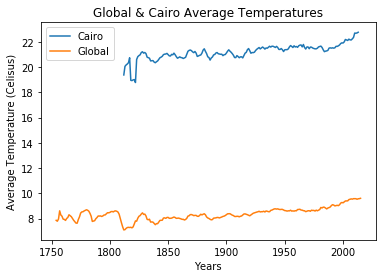

In [21]:
plt.xlabel('Years')
plt.ylabel('Average Temperature (Celisus)')
plt.title('Global & Cairo Average Temperatures')
plt.plot(cairo_df['year'], cairo_df.rolling(5)['avg_temp'].mean())
plt.plot(glb_df['year'], glb_df.rolling(5)['avg_temp'].mean())
plt.legend(['Cairo', 'Global'])

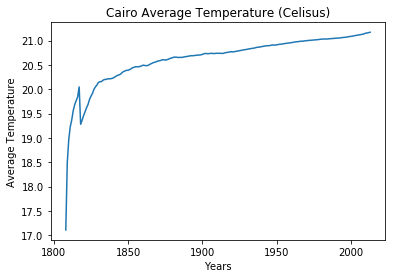

In [22]:
plt.xlabel('Years')
plt.ylabel('Average Temperature')
plt.title('Cairo Average Temperature (Celisus)')
plt.plot(cairo_df['year'], rolling_avg(cairo_df))

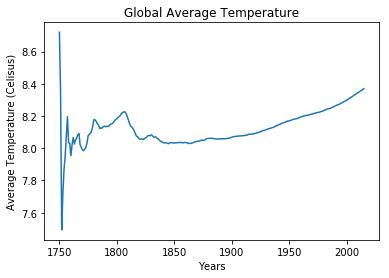

In [23]:
plt.xlabel('Years')
plt.ylabel('Average Temperature (Celisus)')
plt.title('Global Average Temperature')
plt.plot(glb_df['year'], rolling_avg(glb_df))

# Interpretations

As shown in the above figures that:
 - Cairo is much hotter the average of the global temperatures with a difference in the range of 12 to 14 °C.
 - Other than the initial spikes in both the global & Cairo's metrics, the difference is constant.
 - The trend is that the world is getting hotter and hotter (Global Warming).
 - Cairo's weather started to take an increasing trend after the 1800, while the global measure had some fluctuations. 
 - Cairo's Temperature data was not recorded from the beginning of 1750 as the global metrics
 